## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Analysis dataset

In [3]:
dataset = pd.read_csv("diabetes.csv")

In [4]:
dataset.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [5]:
dataset.shape

(768, 9)

In [6]:
print("The total Nan values are ---> {}".format(dataset.isnull().sum().sum()))

The total Nan values are ---> 0


<div style="font-size: 20px;">
There is no null values are there in dataset.
</div>

In [7]:
dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

# Exploratory Data Analysis (EDA)

## Descriptive Statistics:

In [8]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
(dataset == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

<div style="font-size: 20px;">
Biologically Glucose, BloodPressure, SkinThickness, Insulin, BMI can't be zero.
</div>
So, replacing the zeroes with mean value

### Improving the data.

<div style="font-size: 20px;">
Replacing the zeroes with Median value of that age_group
</div>

In [11]:
def replace_zeroes_median(data):
    zeroes_column = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
    ages = [20, 30, 40, 50, 60, 70, 80, 100]
    # Copying the original dataset so that the original data will not change.
    data = data.copy()

    # Create AgeGroup
    data['AgeGroup'] = pd.cut(data['Age'], bins=ages)

    # Replace 0 with NaN
    for feature in zeroes_column:
        data[feature] = data[feature].replace(0, np.nan)

    # Replacing Nan with the mean value of that particular age group
    age_groups = data['AgeGroup'].unique()

    for group in age_groups:
        group_range = data['AgeGroup'] == group
        for feature in zeroes_column:
            group_mean = data.loc[group_range, feature].median()
            data.loc[group_range & data[feature].isna(), feature] = group_mean

    # Drop AgeGroup helper column
    data.drop(columns='AgeGroup', inplace=True)

    return data


In [12]:
dataset = replace_zeroes_median(dataset)

In [13]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               1
SkinThickness               1
Insulin                     1
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
dataset.dropna(inplace = True)

In [15]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
(dataset == 0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     499
dtype: int64

## Data Visualization

In [17]:
def plot_features(dataset):
   #(boxplot, histogram+kde, violin, kde plot)
    fig, axes = plt.subplots(nrows=len(dataset.columns), ncols=4, figsize=(20, len(dataset.columns) * 3))
    
    for i, feature in enumerate(dataset.columns):
        # Boxplot
        sns.boxplot(data=dataset, x=feature, ax=axes[i,0], color='#4a90e2')
        axes[i,0].set_title(f'Boxplot of {feature}', fontsize=14, fontweight='semibold')
        axes[i,0].set_xlabel('')
        axes[i,0].set_ylabel('')

        # Histogram with KDE
        sns.histplot(data=dataset, x=feature, ax=axes[i,1], kde=True, color='#7b68ee')
        axes[i,1].set_title(f'Histogram & KDE', fontsize=14, fontweight='semibold')
        axes[i,1].set_xlabel('')
        axes[i,1].set_ylabel('')

        # Violin plot
        sns.violinplot(data=dataset, x=feature, ax=axes[i,2], color='#50c878')
        axes[i,2].set_title(f'Violin plot', fontsize=14, fontweight='semibold')
        axes[i,2].set_xlabel('')
        axes[i,2].set_ylabel('')

        # KDE plot only
        sns.kdeplot(data=dataset, x=feature, ax=axes[i,3], fill=True, color='#e07a5f')
        axes[i,3].set_title(f'KDE plot', fontsize=14, fontweight='semibold')
        axes[i,3].set_xlabel('')
        axes[i,3].set_ylabel('')

    plt.tight_layout(pad=4.0)
    plt.show()

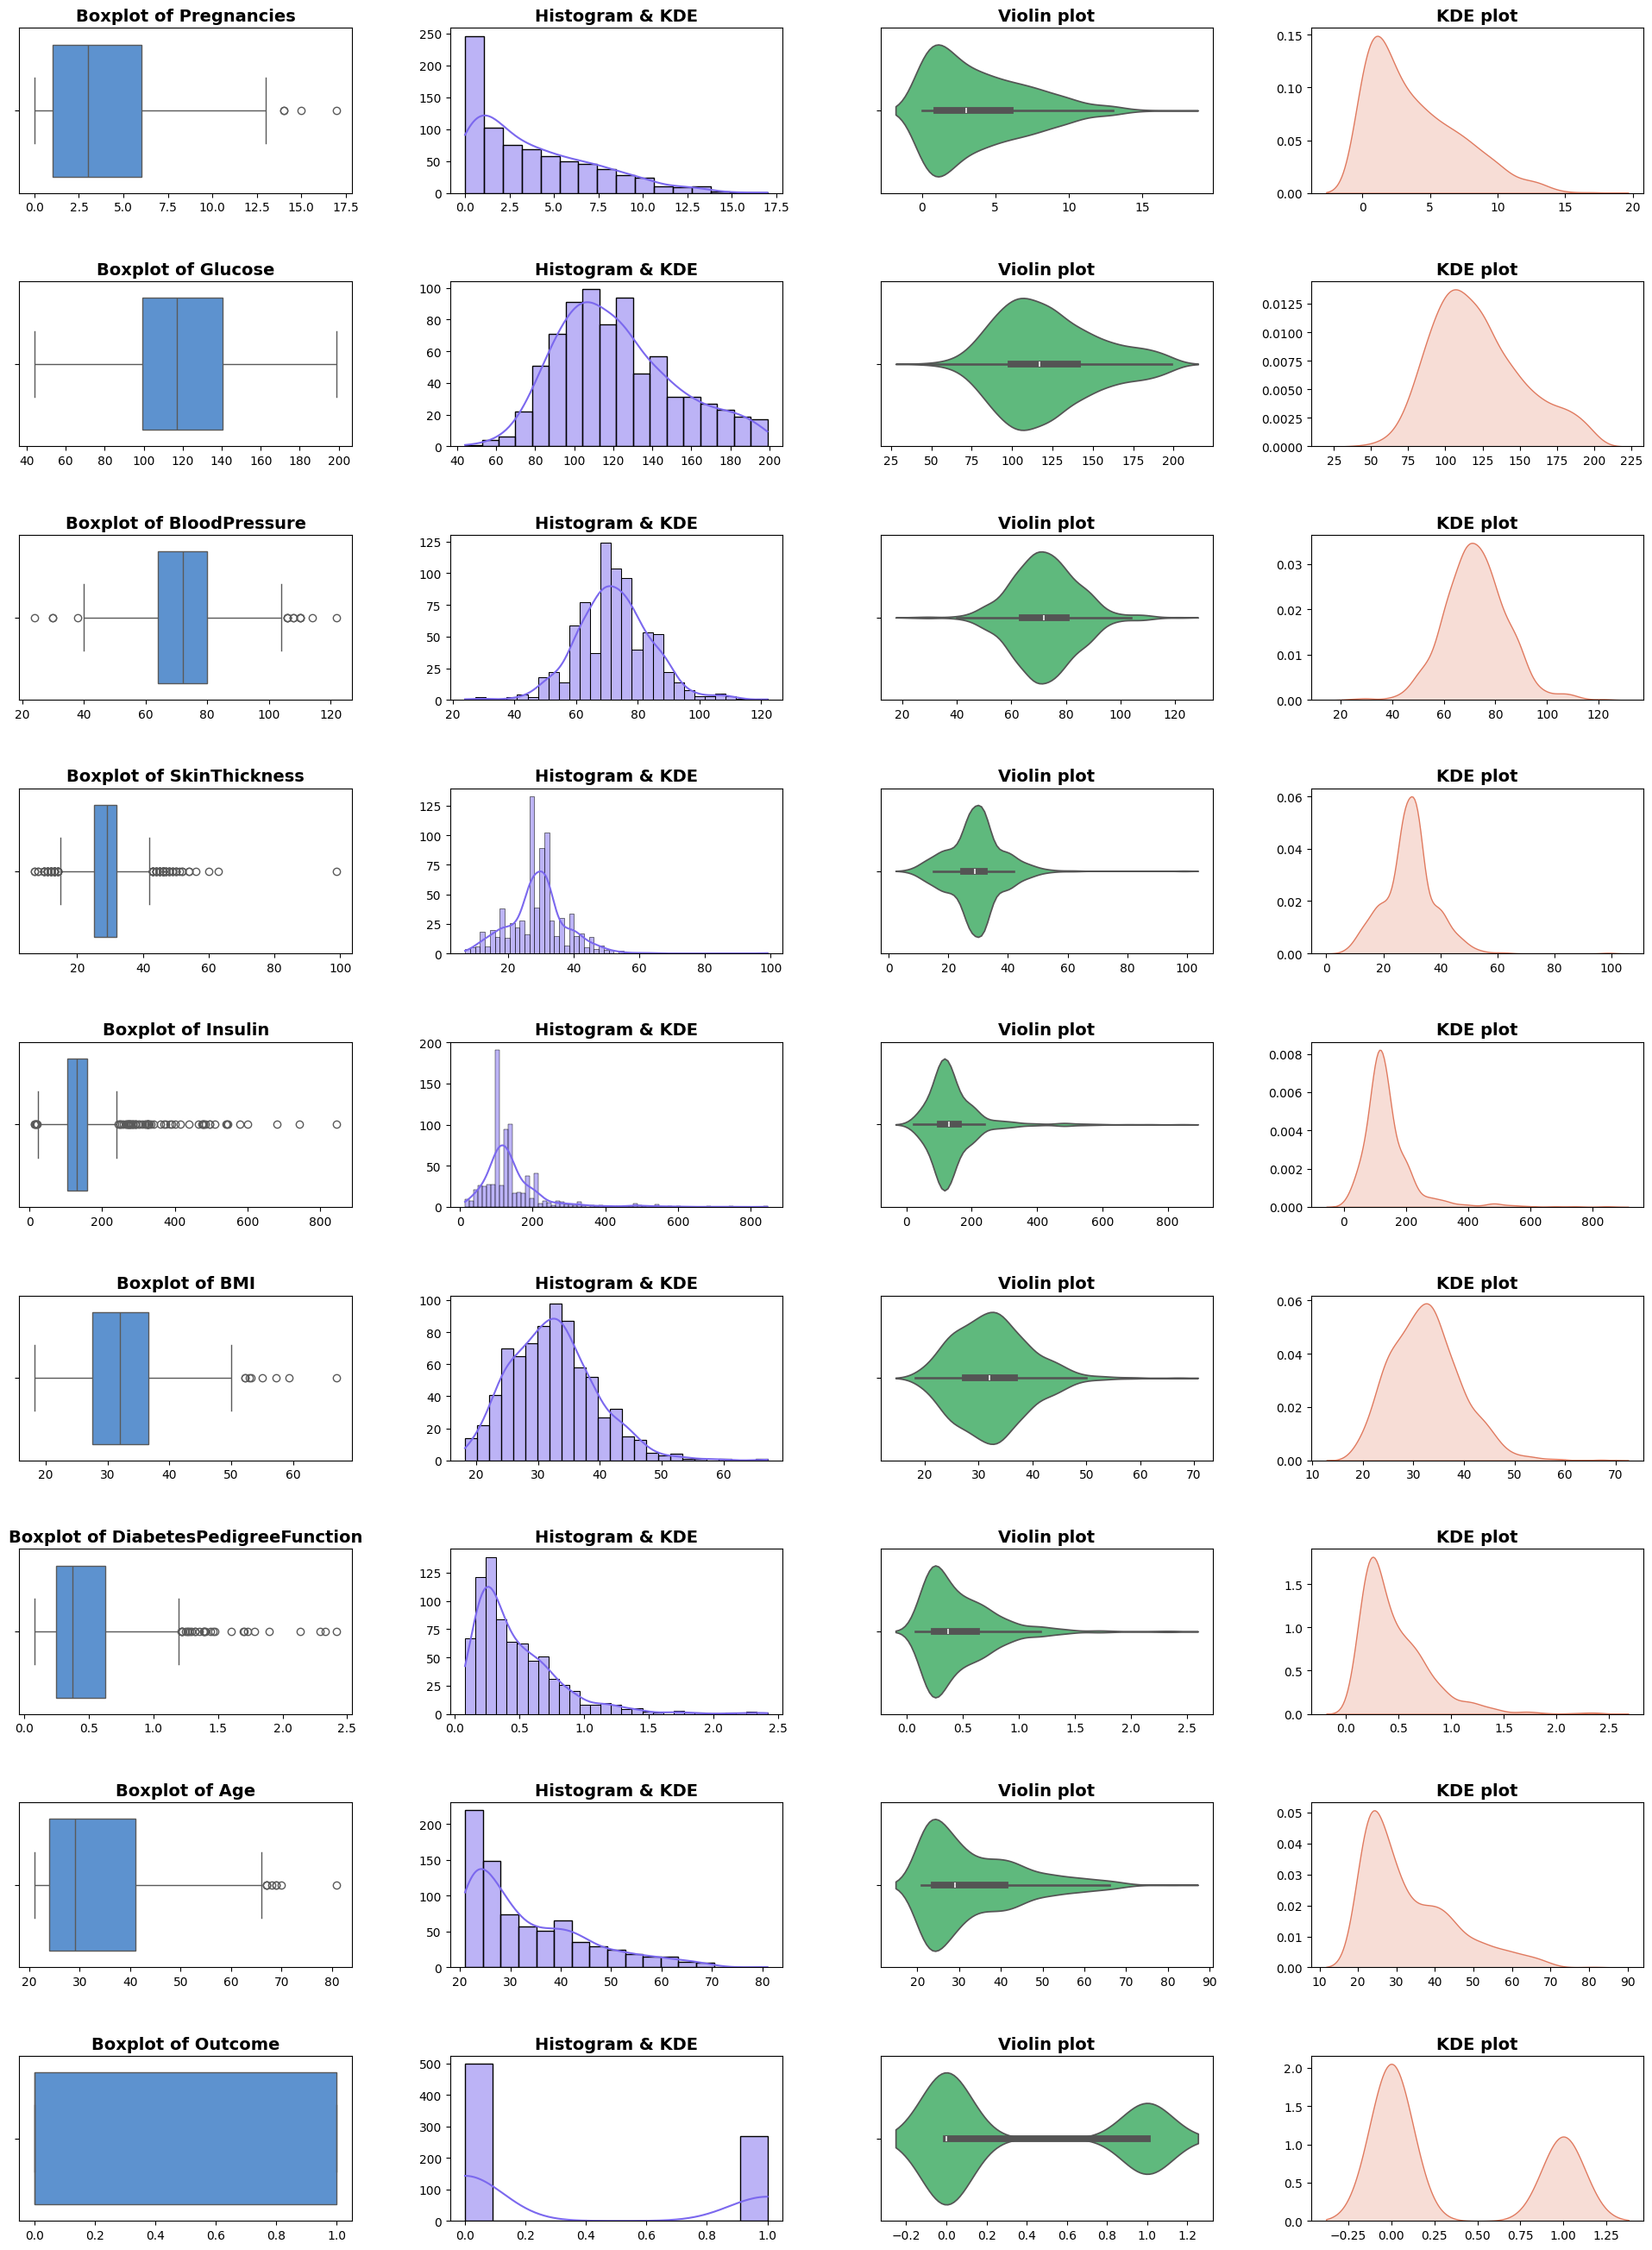

In [18]:
plot_features(dataset)

<Figure size 2000x1800 with 0 Axes>

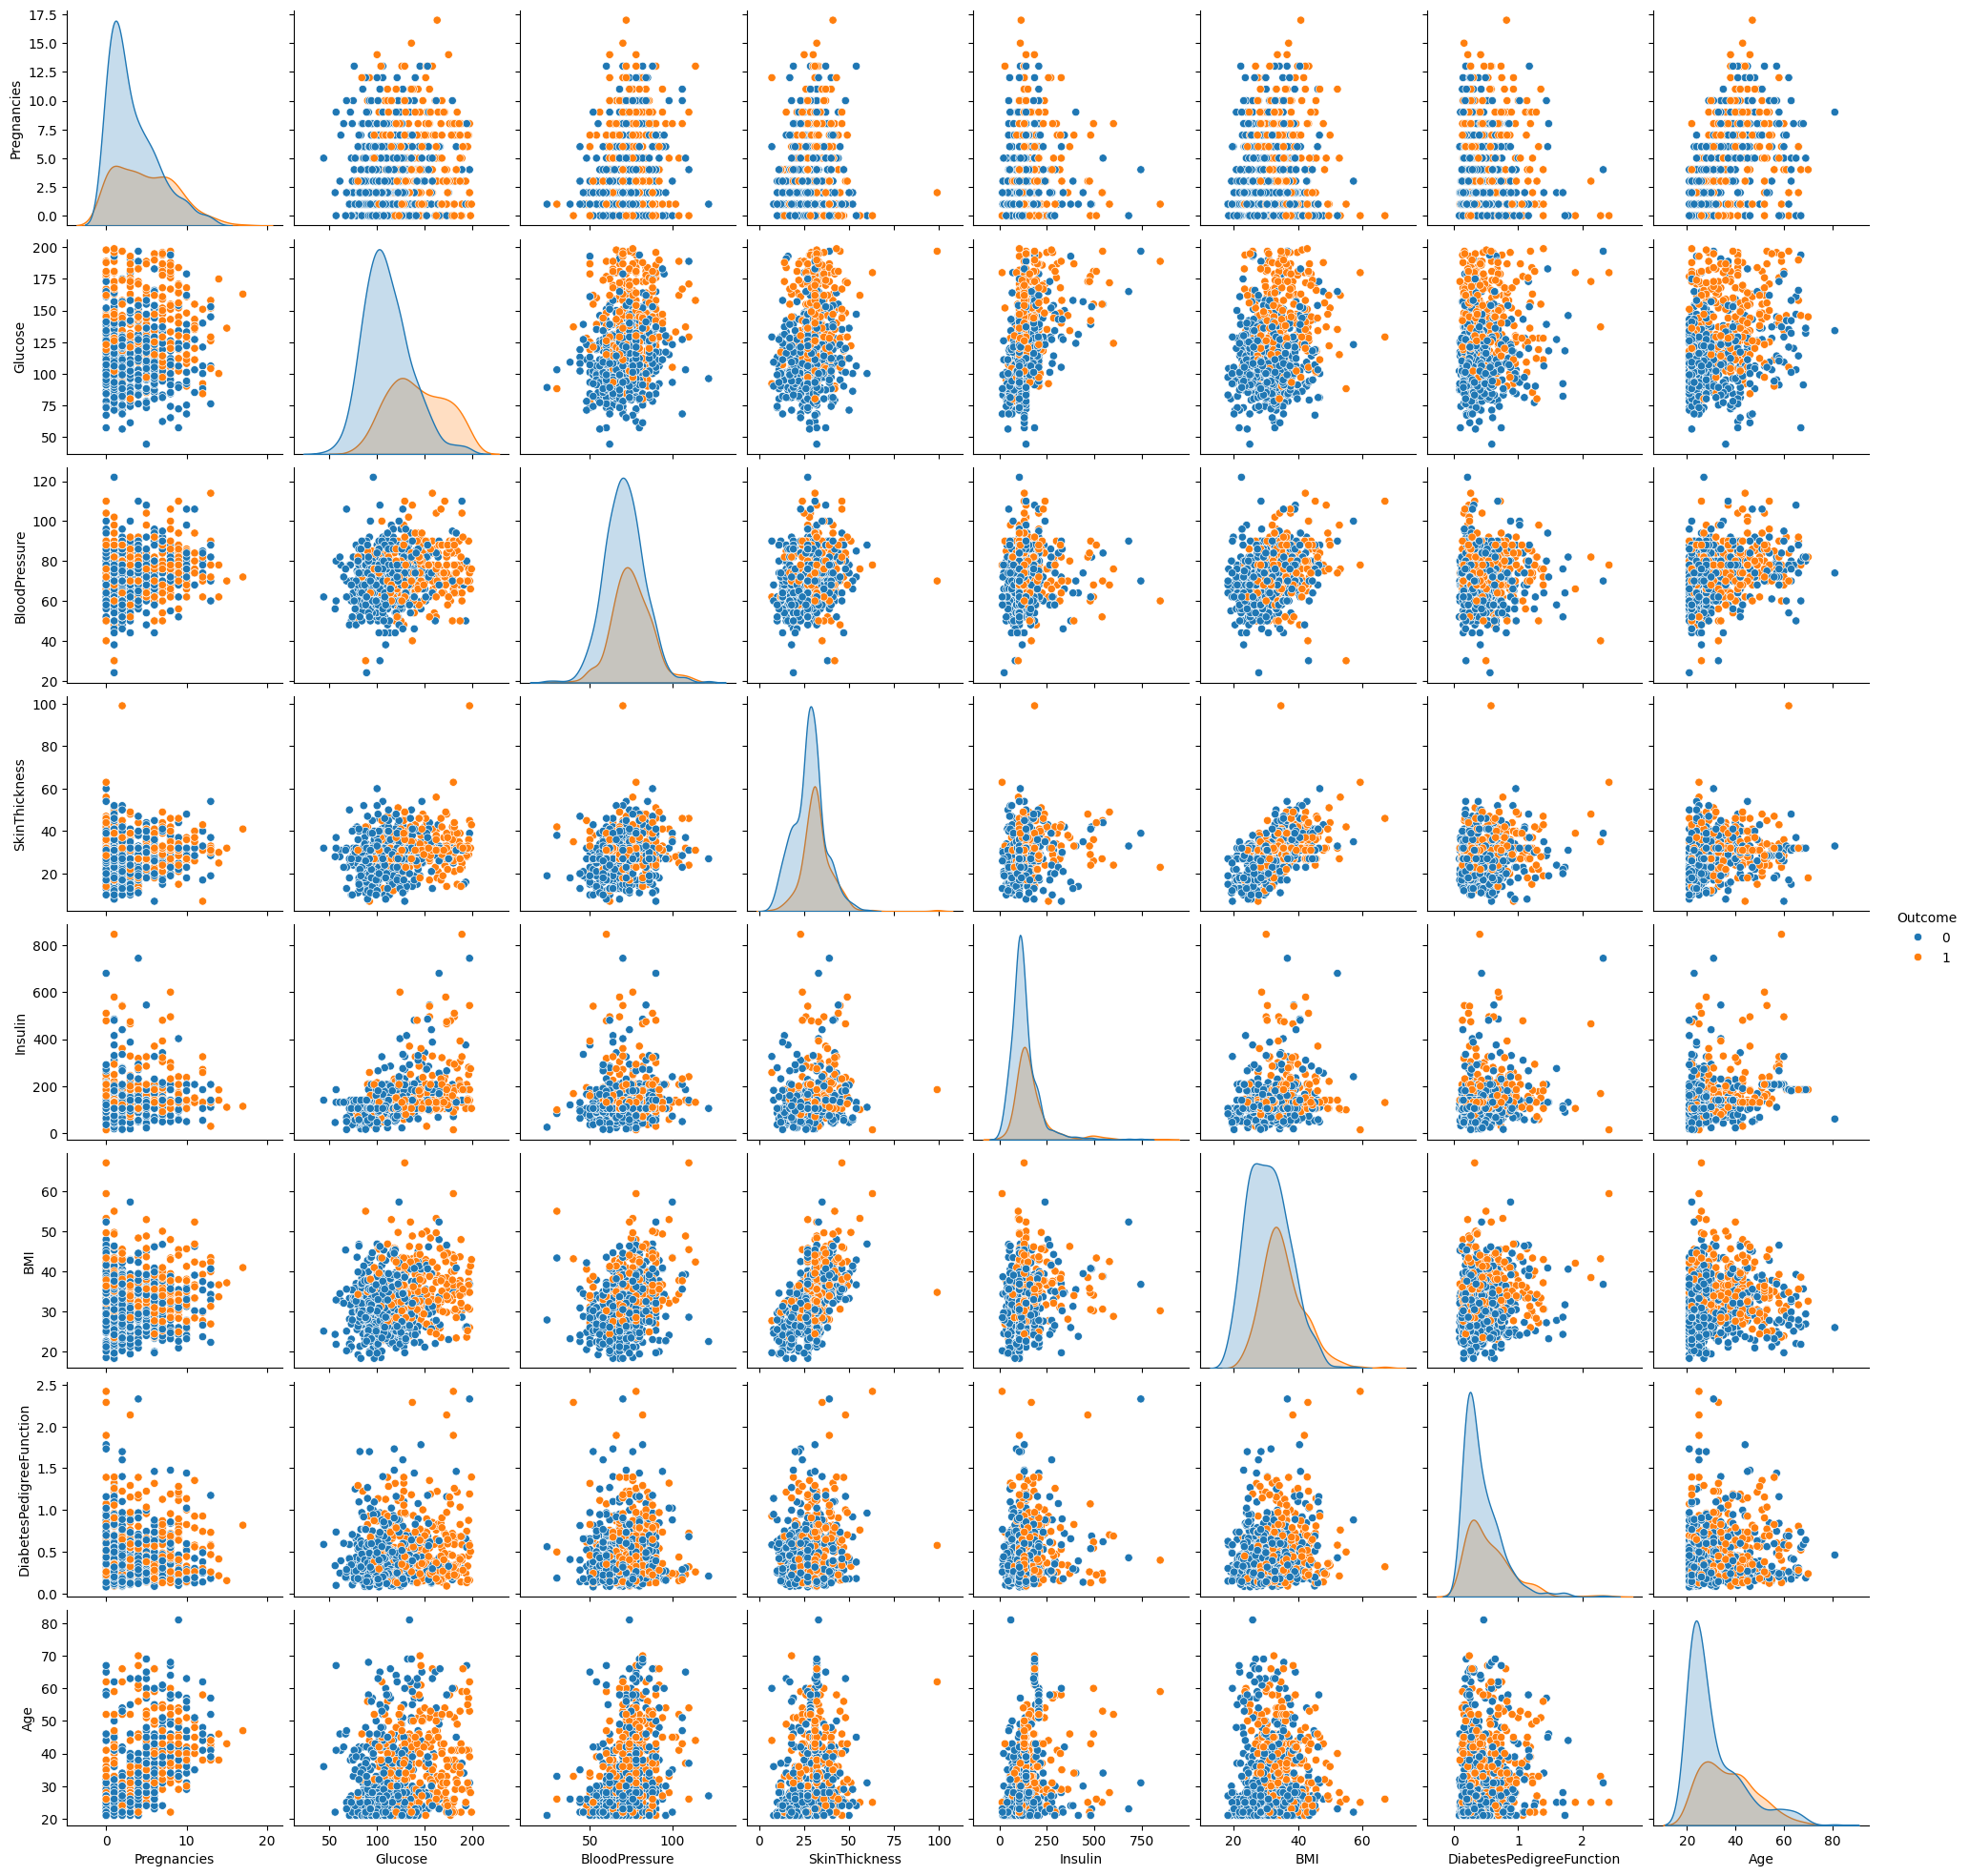

In [19]:
# Pair plot of dataset
plt.figure(figsize=(20, len(dataset.columns) * 2))
pair_plot = sns.pairplot(dataset, hue='Outcome')
plt.show()

<Axes: >

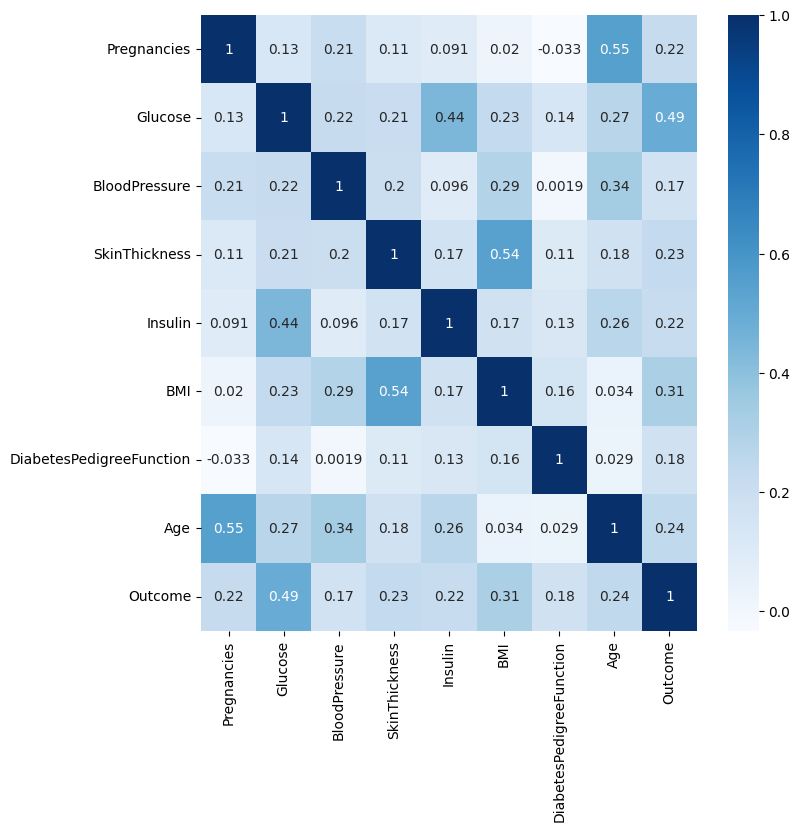

In [20]:
cmap = sns.diverging_palette(80,20, as_cmap=True)
corr= dataset.corr()
f,ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr,cmap='Blues',annot=True)

**As we can see there is Linear correlation between features. So the linear model will not work for this dataset.**

## Outlier removing

In [21]:
data_sample = dataset

In [22]:
outliners = ['Insulin','DiabetesPedigreeFunction']
# outliners = dataset.columns --> dataset drops to (636, 9)
for i in outliners:
  q1 = data_sample[i].quantile(0.25)
  q3 = data_sample[i].quantile(0.75)
  iqr = q3 - q1
  min = q1 - (1.5 * iqr)
  max = q3 + (1.5 * iqr)
  data_sample = data_sample[(data_sample[i] >= min) & (data_sample[i] <= max)]

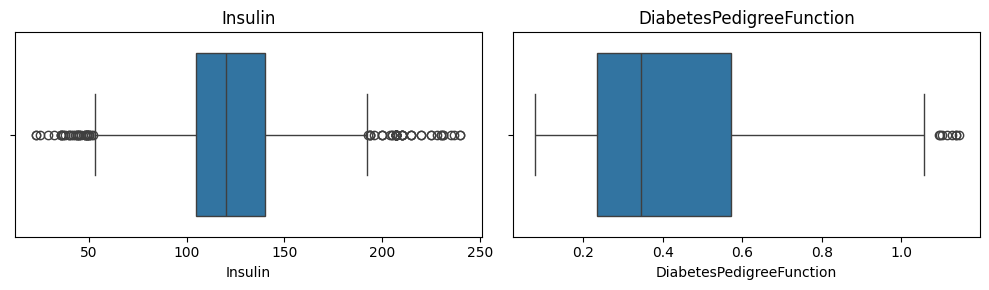

In [23]:
fig,axes = plt.subplots(1,2,figsize =(10,3))
axes = axes.flatten()
for i,features in enumerate(outliners):
    sns.boxplot(data=data_sample,x=features,ax = axes[i])
    axes[i].set_title(features)

plt.tight_layout()
plt.show()

In [24]:
print(f"Shape before outlier removal : {dataset.shape}")
print(f"Shape after outlier removal : {data_sample.shape}")
print(f"Percentage drops in data : {((dataset.shape[0]-data_sample.shape[0])/dataset.shape[0])*100} %")

Shape before outlier removal : (767, 9)
Shape after outlier removal : (672, 9)
Percentage drops in data : 12.385919165580182 %


In [25]:
X = data_sample.drop(['Outcome'],axis = 1)
Y = data_sample['Outcome']

## Model selection

<div style="font-size: 20px;">
Linear / Polynomial / Logistic Models.
</div>

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

In [27]:
# Polynomial Regression
def polynomial(X):
    pf = PolynomialFeatures(degree=2)
    x_poly = pf.fit_transform(X)
    x_train,x_test,y_train,y_test = train_test_split(x_poly,Y,random_state=21,test_size=0.2)
    lr1 = LinearRegression()
    lr1.fit(x_train,y_train)
    print(f"For the Polynomial Regression:\nTraining --->  {lr1.score(x_train,y_train)*100}%")
    print(f"For test --->  {(lr1.score(x_test,y_test)*100)}%\n")

In [28]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=21,test_size=0.2)

In [29]:
print(f"{x_train.shape},{y_train.shape},{x_test.shape},{y_test.shape}")

(537, 8),(537,),(135, 8),(135,)


In [30]:
linear = LinearRegression()
logistic = LogisticRegression()

models = [linear, logistic]

model_dict = {0: "Linear regression", 1: "Logistic Regression"}

In [32]:
acc_train = []
acc_test = []
for i, model in enumerate(models):
    model.fit(x_train, y_train)
    accuracy_train = model.score(x_train,y_train)
    accuracy_test = model.score(x_test,y_test)
    acc_train.append(accuracy_train*100)
    acc_test.append(accuracy_test*100)
    print(f"{model_dict[i]}:\nTraining --->  {accuracy_train * 100}%")
    print(f"For test --->  {accuracy_test * 100}%\n")
polynomial(X)

Linear regression:
Training --->  34.03154286105469%
For test --->  28.50593095745606%

Logistic Regression:
Training --->  80.26070763500931%
For test --->  77.77777777777779%

For the Polynomial Regression:
Training --->  40.67382755987845%
For test --->  12.612347151227043%



**Best Accuracy we get is from logistic regression**

In [33]:
score_train = []
score_test = []
iteration = []
for i in range(100,1000,50):
    logistic = LogisticRegression(max_iter=i)
    logistic.fit(x_train,y_train)
    score_train.append(logistic.score(x_train,y_train)*100)
    score_test.append(logistic.score(x_test,y_test)*100)
    iteration.append(i)

In [34]:
sorted_df = pd.DataFrame({
    'Iteration': iteration,
    'Training Score': score_train,
    'Testing Score': score_test
}).sort_values(by = ['Testing Score'],ascending=False)
sorted_df.head(5)

,Iteration,Training Score,Testing Score
0,100,80.260708,77.777778
1,150,79.702048,77.777778
2,200,79.702048,77.777778
3,250,79.702048,77.777778
4,300,79.702048,77.777778


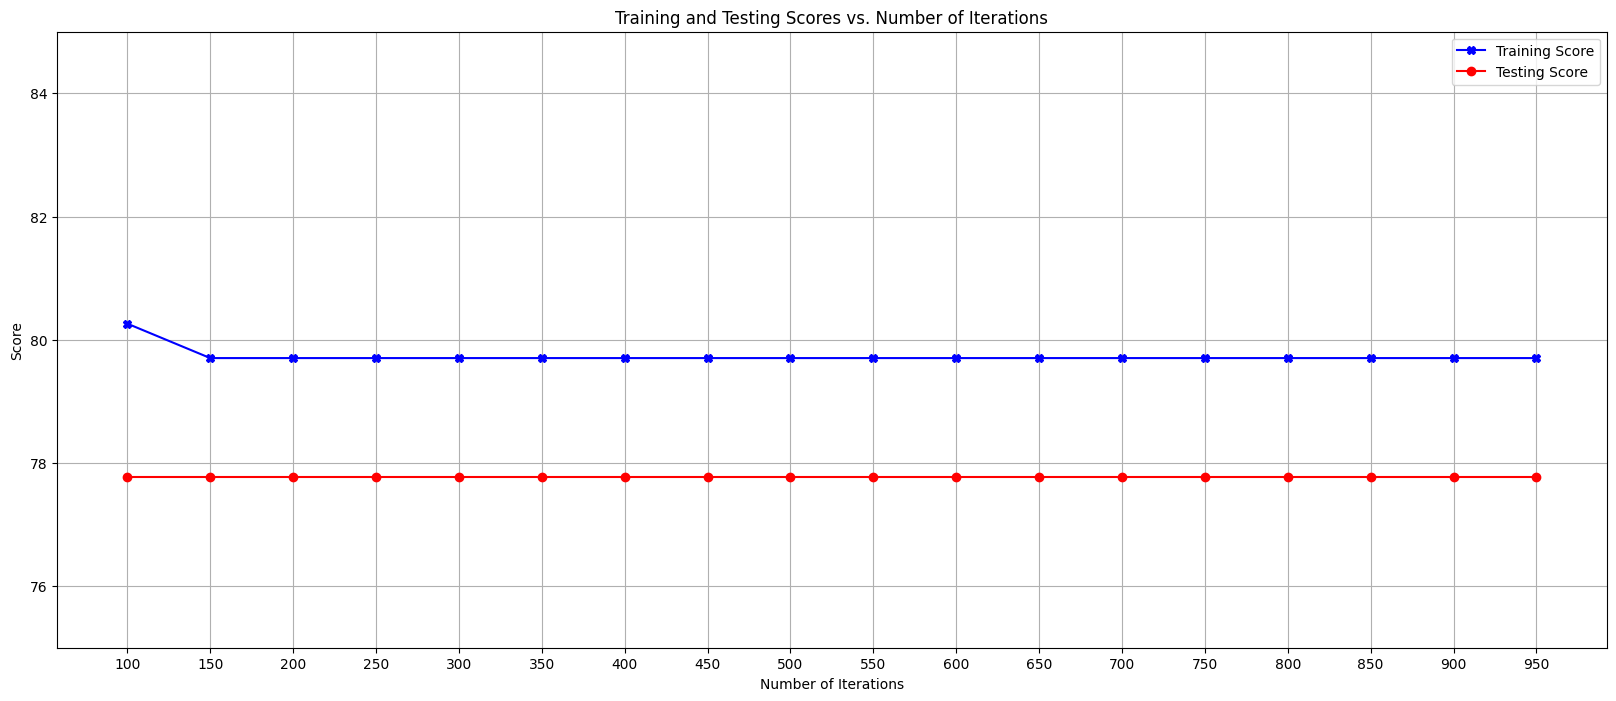

In [35]:
plt.figure(figsize=(20, 8))
plt.plot(iteration, score_train, marker='X', label='Training Score', color='blue')
plt.plot(iteration, score_test, marker='o', label='Testing Score', color='red')
plt.title('Training and Testing Scores vs. Number of Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Score')
plt.xticks(iteration)
plt.ylim(75, 85)
plt.grid()
plt.legend()
plt.show()

### Random search Cv

In [36]:
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [37]:
param_dist = {
    'C': uniform(loc=0, scale=4),
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'max_iter': [100, 200, 300, 400, 500]
}


In [38]:
logistic_model = LogisticRegression()

random_search = RandomizedSearchCV(
    estimator=logistic_model,
    param_distributions=param_dist,
    n_iter=300,
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

In [39]:
random_search.fit(x_train, y_train)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_iter=300, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000025F7FECF2C0>,
                                        'max_iter': [100, 200, 300, 400, 500],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'saga']},
                   random_state=42, verbose=1)

In [40]:
# Get the best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Cross-Validation Score: {best_score:.3f}')


Best Parameters: {'C': np.float64(0.31382552536906383), 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Cross-Validation Score: 0.795


In [41]:
# Evaluate the model on the test set
test_score = random_search.score(x_test, y_test)
print(f'Test Score: {test_score:.3f}')


Test Score: 0.785


### Model Evaluation

In [42]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score

In [43]:
model = LogisticRegression(C =  np.float64(0.31382552536906383),
                           max_iter = 500,
                           penalty =  'l2',
                           solver = 'lbfgs')
model.fit(x_train,y_train)

LogisticRegression(C=np.float64(0.31382552536906383), max_iter=500)

In [44]:
print(f"Training accuracy is : {model.score(x_train,y_train)*100} %")
print(f"Testing accuracy is : {model.score(x_test,y_test)*100} %")

Training accuracy is : 79.51582867783985 %
Testing accuracy is : 78.51851851851852 %


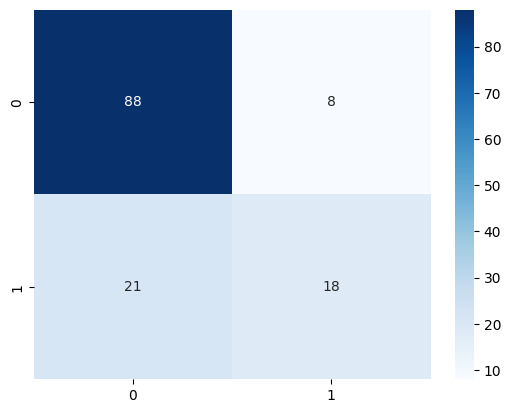

In [45]:
cf = confusion_matrix(y_test,model.predict(x_test))
sns.heatmap(cf,annot=True,cmap = 'Blues')
plt.show()

In [46]:
print(f"Precision score is : {precision_score(y_test,model.predict(x_test))*100}%")
print(f"Recall score is : {recall_score(y_test,model.predict(x_test))*100}%")
print(f"F1 score is : {f1_score(y_test,model.predict(x_test))*100}%")

Precision score is : 69.23076923076923%
Recall score is : 46.15384615384615%
F1 score is : 55.38461538461539%


### Saving the model

In [47]:
# import pickle

In [48]:
# filename = 'trained_model.sav'
# pickle.dump(model,open(filename,'wb'))

In [49]:
# loaded_model = pickle.load(open('trained_model.sav', 'rb'))